<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2025<br>
<font color=3C99D size=5>
Practical Assignment 1 - Search <br>
<font color=696880 size=4>
Amir Homayoon sharifi zade

____________

In [ ]:
#insert your information
NAME = 'Matin Bagheri'
STUDENT_NUMBER = '402105727'

# Libraries

In [1]:
import random
import heapq
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import time
from itertools import chain, combinations

# **Uninformed Search**

In this part you are going to implement the famous algorithms of graph search on some random graph.
At first you will implement DFS, after that BFS will be implemented and finally you'll implement some heuristic and preform A*.
Here are some helper functions to generate and plot the graph. Do not touch the code in the below cells and only complete the parts with a TODO hashtag.

In [2]:
# Create a random graph with blocked edges (None means blocked)
def generate_random_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}
    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight
    return graph

In [3]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()


# DFS

In [4]:
def dfs(graph, start, goal):
    #TODO: implement DFS search
    #return the "path" which is a list of nodes in path and the "explored" which is list of nodes who are explored

    predecessors = {}  # Dictionary to reconstruct the path
    visited = set()  # Keeps track of visited nodes
    stack = deque()  # Stack for DFS traversal
    stack.append((start, None))

    while stack:
        current, prev = stack.pop()
        if current in visited:
            continue

        predecessors[current] = prev
        visited.add(current)

        if current == goal:
            route = deque()
            while current is not None:
                route.appendleft(current)
                current = predecessors[current]
            return list(route), list(visited) # return the found path

        for next in reversed(graph[current]): # add neighbors to stack
            if next not in visited:
                stack.append((next, current))

    return None, list(visited)  # Return None if no path is found

   # return path, explored


# BFS

In [5]:
def bfs(graph, start, goal):
    #TODO: implement BFS search
    #return the "path" which is a list of nodes in path and the "explored" which is list of nodes who are explored

    parent_tracker = {}  # Map to track paths
    checked = set()  # Tracks explored nodes
    queue = deque()  # Queue for BFS
    queue.append((start, None))

    while queue:
        current, prev = queue.popleft()
        if current in checked:
            continue

        parent_tracker[current] = prev
        checked.add(current)

        if current == goal:
            path_result = deque()
            while current is not None:
                path_result.appendleft(current)
                current = parent_tracker[current]
            return list(path_result), list(checked) # return the found path

        for neighbor in graph[current]:
            if neighbor not in checked:
                queue.append((neighbor, current))

    return None, list(checked)  # Return None if no path is found

    # return path, explored


**So far, we have explored two uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).**

Your Answer:

#### **DFS**
##### **Advantages:**
1. **Uses Less memory:** DFS only needs to store the path from the start node to the current node.
2. **Faster for Deep Solutions**
3. **Works Well for Large Mazes with Few Solutions:** When the maze has long corridors and few branching paths.

##### **Disadvantages:**
1. **Not Guaranteed to Find the Shortest Path**
2. **Can Get Stuck in Deep Paths:** If a wrong path goes very far, then backtacking would take so long and make it inefficient.


#### **BFS**
##### **Advantages:**
1. **Guaranteed to Find the Shortest Path**
2. **Better for Wide Trees** BFS efficiently finds the shortest path in uniform cost graphs (such as unweighted mazes).
3. **More Systematic Exploration:** BFS checks all neighbors before moving deeper, therefor it has complete coverage.

##### **Disadvantages:**
1. **High Memory Usage:** BFS stores all nodes at a given depth, which is far more costly in large mazes with many branching paths.
2. **Slower in Deep Mazes**
3. **Less Efficient in Sparse Graphs:** If the maze has very few pathways but a large number of nodes, BFS may explore unnecessary areas.

### **Comparison**
- V: number of vertices
- E: number of edges
- **Time Complexity:** Both in worst-case **O(V + E)**.
- **Memory Usage:** DFS uses **O(d)** space (d is the depth of the deepest path). BFS uses **O(b^d)** (b is the branching factor and d is the depth).


# A star


In [6]:
# Define heuristic functions
# A* Search (using simple heuristics: Manhattan distance or random)
def manhattan_distance(a, b, pos):
    #TODO: implement manhattan distance
    x1, y1 = pos[a]
    x2, y2 = pos[b]
    return abs(x1 - x2) + abs(y1 - y2)

# Random heuristic
def random_heuristic(a, b, pos):
    return random.randint(1, 10)  # Random heuristic for demonstration

def a_star(graph, start, goal, heuristic, pos):
    #TODO: implement A* search
    #return the "path" which is a list of nodes in path and the "explored" which is list of nodes who are explored

    priority_queue = []  # Min-heap priority queue
    heapq.heappush(priority_queue, (0, start, None))  # (cost, node, parent)
    cost_so_far = {start: 0}  # Stores the cost to reach each node
    parents = {}  # Stores the path to reconstruct the shortest route
    explored = set()

    while priority_queue:
        _, current, parent = heapq.heappop(priority_queue)

        if current in explored:
            continue

        parents[current] = parent
        explored.add(current)

        if current == goal:
            path = deque()
            while current is not None:
                path.appendleft(current)
                current = parents[current]
            return list(path), list(explored) # return the found path

        for neighbor, cost in graph[current].items():
            new_cost = cost_so_far[current] + cost
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal, pos)
                heapq.heappush(priority_queue, (priority, neighbor, current))

    return None, list(explored)  # Return None if no path is found

    # return path, explored


# Results

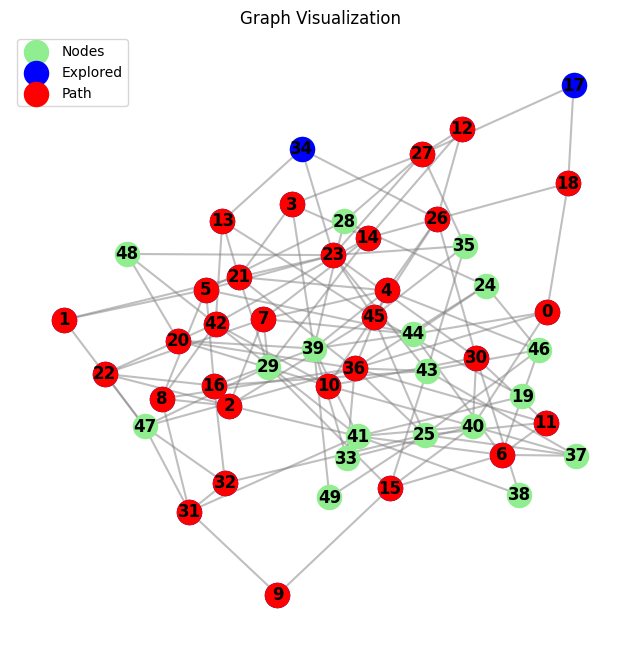

DFS Path: [0, 18, 14, 3, 21, 1, 5, 8, 2, 7, 4, 26, 12, 27, 23, 30, 10, 20, 36, 11, 6, 15, 9, 31, 32, 16, 22, 42, 13, 45]


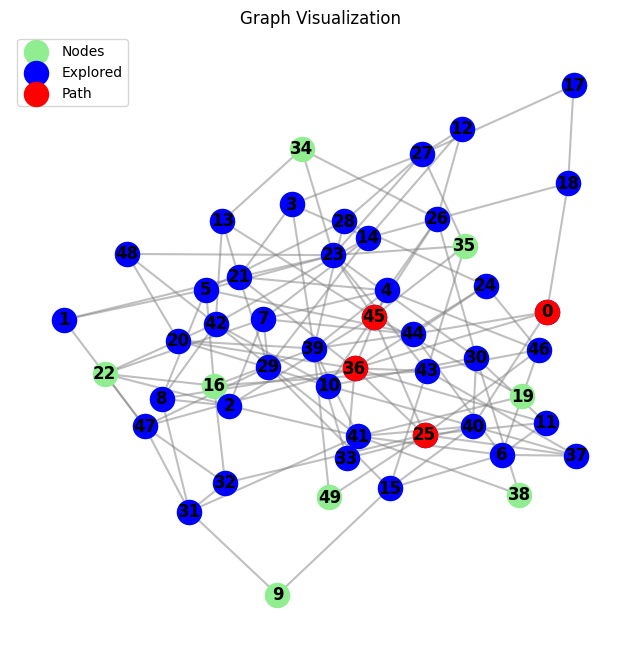

BFS Path: [0, 36, 25, 45]


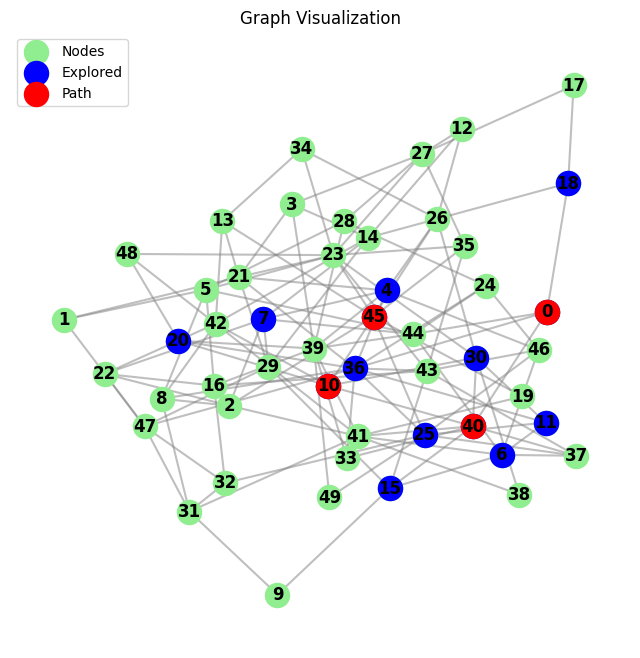

A* Path with Random Heuristic: [0, 40, 10, 45]


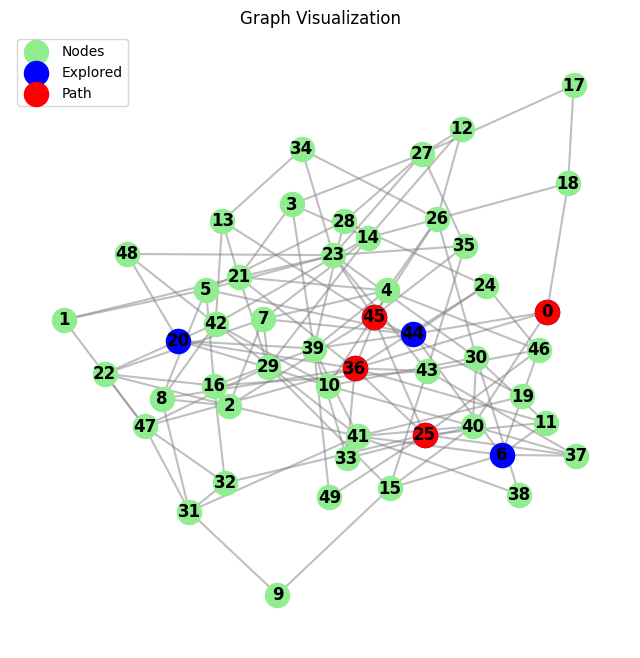

A* Path with Manhattan Distance Heuristic: [0, 36, 25, 45]


In [11]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random graph
random_graph = generate_random_graph(num_nodes)

# # Get random node positions for Manhattan distance calculation
positions = {i: (random.randint(0, 100), random.randint(0, 100)) for i in range(num_nodes)}

# Run DFS
path_dfs, explored_dfs = dfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_dfs, explored=explored_dfs)
print(f"DFS Path: {path_dfs}")

# Run BFS
path_bfs, explored_bfs = bfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_bfs, explored=explored_bfs)
print(f"BFS Path: {path_bfs}")

# Run A* with Random Heuristic in same manner as above
path_a_star_random, explored_a_star_random = a_star(random_graph, start_node, goal_node, random_heuristic,positions)
plot_graph(random_graph, path=path_a_star_random, explored=explored_a_star_random)
print(f"A* Path with Random Heuristic: {path_a_star_random}")

# Run A* with Manhattan Distance Heuristic
path_a_star_manhattan, explored_a_star_manhattan = a_star(random_graph, start_node, goal_node, manhattan_distance ,positions)
plot_graph(random_graph, path=path_a_star_manhattan, explored=explored_a_star_manhattan)
print(f"A* Path with Manhattan Distance Heuristic: {path_a_star_manhattan}")


**Explain your heuristic and observation's result. Also, compare the A\* method with Uninformed search in the context of the problem.**

The random heuristic is not consistent and therefore there's no guaranteeto find optimal solution.

Next heuristic was Manhattan distance which is consistent nad therefore find's the optimal path.

DFS: found a very long path, which is not optimal.

BFS: found shortest path which happens to be the optimal one too, since it's the same as the A** result. but it checked more states than needed.

A*: found the optimal path with better time and space/memory complexity.

# **Weigted Graph**

In this part we are going to explore a situation in which every vertice has some cost and we want to minimize the cost as well. So one can say that the part before was a special kind of Weighted Graph with weights equal to 1 in every vertice.
Again the two cells below are helper functions that should not be modified.

In [12]:
# Create a random graph with weights on edges
def generate_weighted_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}

    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight  # Undirected graph
    return graph


In [13]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Display edge weights (weights on the edges)
    edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='blue')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization with Weights")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()


# DFS With Cost

In [17]:
# Depth-First Search (DFS) with weight sum
def dfs_weighted(graph, start, goal):
    #TODO: implement DFS search
    #returns the path(list) and weight_sum(int) and explored(list)
    #Reconstruct the path and calculate the weight sum

    visited_nodes = set()
    search_stack = [(start, None, 0)]  # (node, parent, cost)
    path_map = {}
    total_cost = {start: 0}

    while search_stack:
        node, parent, cost = search_stack.pop()

        if node in visited_nodes:
            continue

        visited_nodes.add(node)
        path_map[node] = parent
        total_cost[node] = cost

        if node == goal:
            path = deque()
            while node is not None:
                path.appendleft(node)
                node = path_map[node]
            return list(path), total_cost[goal], list(visited_nodes) # return the found path

        for neighbor, weight in reversed(graph[node].items()):
            if neighbor not in visited_nodes:
                search_stack.append((neighbor, node, total_cost[node] + weight))

    return None, None, list(visited_nodes)  # Return None if no path is found

    # return None


# BFS With Cost

In [18]:
# Breadth-First Search (BFS) with weight sum
def bfs_weighted(graph, start, goal):
    #TODO: implement BFS search
    #returns the path(list) and weight_sum(int) and explored(list)
    #Reconstruct the path and calculate the weight sum

    total_cost = {start: 0}
    path_map = {}
    queue = deque([(start, None, 0)])  # (node, parent, cost)
    visited_nodes = set()

    while queue:
        node, parent, cost = queue.popleft()

        if node in visited_nodes:
            continue

        visited_nodes.add(node)
        path_map[node] = parent
        total_cost[node] = cost

        if node == goal:
            path = deque()
            weight_sum = 0
            while node is not None:
                path.appendleft(node)
                weight_sum += total_cost[node]
                node = path_map[node]
            return list(path), weight_sum, list(visited_nodes) # return the found path

        for neighbor, weight in graph[node].items():
            if neighbor not in visited_nodes:
                queue.append((neighbor, node, total_cost[node] + weight))

    return None, None, list(visited_nodes)  # Return None if no path is found


# Dijkstra (UCS)

In [15]:
# Dijkstra's Algorithm
def dijkstra(graph, start, goal):
    #TODO: implement Dijkstra search
    # returns the path(list) and weight_sum(int) and explored(list)
    # Reconstruct the path and calculate the weight sum

    # Priority queue to hold nodes to be explored, based on their tentative distance
    # If a shorter path to the neighbor is found, update the priority queue
    # Reconstruct the path and calculate the weight sum

    explored = set()
    cost_so_far = {start: 0}
    priority_queue = []
    parent_map = {}
    heapq.heappush(priority_queue, (0, start, None))  # (cost, node, parent)

    while priority_queue:
        cost, current, parent = heapq.heappop(priority_queue)

        if current in explored:
            continue

        explored.add(current)
        parent_map[current] = parent

        if current == goal:
            path = deque()
            while current is not None:
                path.appendleft(current)
                current = parent_map[current]
            return list(path), cost, list(explored) # return the found path

        for neighbor, weight in graph[current].items():
            new_cost = cost + weight
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                heapq.heappush(priority_queue, (new_cost, neighbor, current))

    return None, None, list(explored)  # Return None if no path is found


# Results

DFS Path: [0, 16, 3, 37, 8, 20, 7, 9, 11, 5, 17, 13, 26, 6, 24, 27, 23, 2, 4, 22, 1, 14, 29, 28, 32, 41, 21, 45]
DFS Weight Sum: 141
BFS Path: [0, 16, 13, 45]
BFS Weight Sum: 45
Dijkstra Path: [0, 43, 30, 7, 23, 45]
Dijkstra Weight Sum: 17


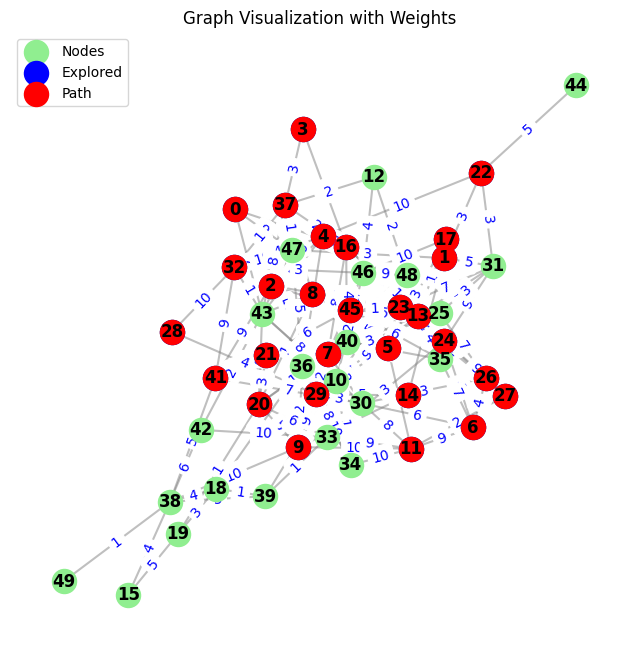

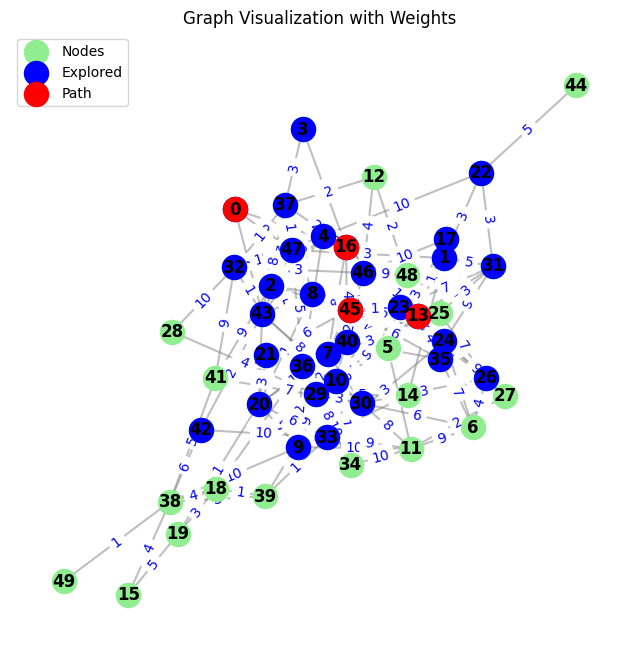

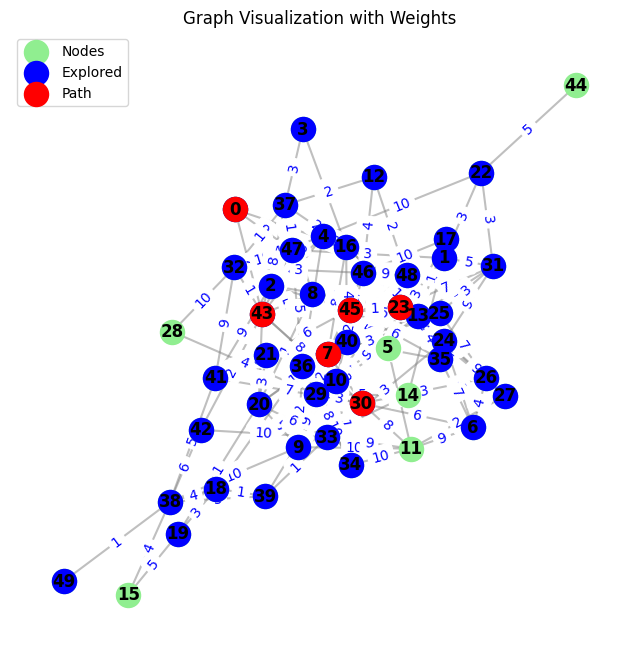

In [21]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random weighted graph
weighted_graph = generate_weighted_graph(num_nodes)

# Run DFS
path_dfs, weight_dfs, explored_dfs = dfs_weighted(weighted_graph, start_node, goal_node)
print(f"DFS Path: {path_dfs}")
print(f"DFS Weight Sum: {weight_dfs}")

# Run BFS
path_bfs, weight_bfs, explored_bfs = bfs_weighted(weighted_graph, start_node, goal_node)
print(f"BFS Path: {path_bfs}")
print(f"BFS Weight Sum: {weight_bfs}")

# Run Dijkstra
path_dijkstra, weight_dijkstra, explored_dijkstra = dijkstra(weighted_graph, start_node, goal_node)
print(f"Dijkstra Path: {path_dijkstra}")
print(f"Dijkstra Weight Sum: {weight_dijkstra}")

# Visualize the results
plot_graph(weighted_graph, path=path_dfs, explored=explored_dfs)
plot_graph(weighted_graph, path=path_bfs, explored=explored_bfs)
plot_graph(weighted_graph, path=path_dijkstra, explored=explored_dijkstra)


**What are the key diffrences between dijkstra, bfs and dfs? Which one of them has acted better in our problem and why? What happens when graph is directed?**

Dijkstra makes sure to find the optimal path (least sum of weights). It doesn't care about the length of the path (number of edges), weight is what matters.

BFS finds the shortest path (least number of edges) and doesn't consider weight. There for it's unable to find the optial path in weighted graphs.

DFS goes so deep and can't find the shortest path or the optimal one.

As we can see in the sample above, Dijkstra came up with the optimal solution and acted better. Dijkstra is reliable when dealing with non-negative weights.

They all function the just same in directed graphs.

# **Local Search**

# Problem definition
In this part, you should implement **Hill-Climbing** and **Genentic** algorithms. Afterwards you will test them on a formal np problem (Subset Sum)

Suppose we have a limit for our back pack that we show with *target_sum* and random number of materials with some rand weights which are present in *nums*. To do that we will implement 3 algorithms. First, you should implement  **Hill-Climbing**, and then you should implement the **Genetic Algorithm**. At last, you should find the actual answer using **Naive Search (brute force)**.

In [22]:
# Sample input for Subset Sum Problem
target_sum = 60
nums = [random.randint(1, 10) for _ in range(15)]  # Random list of 15 integers between 1 and 10

print(f"Numbers: {nums}")
print(f"Target Sum: {target_sum}")


Numbers: [4, 7, 5, 2, 8, 2, 6, 8, 9, 1, 6, 8, 3, 5, 10]
Target Sum: 60


# Hill Climbing

In order to implement hill climbing, you must at first define the neighbors in your model. We suggest that every addition or omition of your current bag should be a neighbor yet you can implement it how you want.

In [23]:
def hill_climbing(nums, target_sum):
    #Random initial solution (subset of nums)
    current_solution = random.sample(nums, random.randint(1, len(nums)))
    current_sum = sum(current_solution)
    #TODO Hill climbing
    #return a current solution = best state value
    #Hill climbing loop
    #Generate neighbors by adding one element or removing one element
    #Evaluate the neighbors by calculating the sum
    #If no improvement, stop

    # Generate a random initial solution
    current_solution = random.sample(nums, random.randint(1, len(nums)))
    current_sum = sum(current_solution)

    while True:
        if current_sum == target_sum:
            return current_solution

        best_solution = None
        best_difference = abs(current_sum - target_sum)

        # Generate neighbors by adding or removing one element
        for num in nums:
            new_solution_add = current_solution + [num] if num not in current_solution else current_solution
            new_solution_remove = [n for n in current_solution if n != num]

            new_sum_add = sum(new_solution_add)
            new_sum_remove = sum(new_solution_remove)

            # Check if adding improves the solution
            if abs(new_sum_add - target_sum) < best_difference:
                best_solution = new_solution_add
                best_difference = abs(new_sum_add - target_sum)

            # Check if removing improves the solution
            if abs(new_sum_remove - target_sum) < best_difference:
                best_solution = new_solution_remove
                best_difference = abs(new_sum_remove - target_sum)

        # If no improvement, return current solution
        if best_solution is None:
            return current_solution

        current_solution = best_solution
        current_sum = sum(current_solution)

    return current_solution


# Genetic Algorithm
As you have learned, in order to implement GA, you need to define mutation function and crossover functions(single pointed one would be enough).

Then, in main GA body, a population of random solutions (subsets) is created. These solutions evolve over a number of generations through selection, crossover, and mutation.
The algorithm aims to evolve the population towards finding a subset whose sum is as close as possible to the target sum. After a set number of generations, the algorithm returns the best solution found.

In [24]:
def tournament_selection(population, target_sum, tournament_size=5):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: abs(target_sum - sum(x)))
    return tournament[0]  # Best solution in the tournament

def crossover(parent1, parent2):
    # Single-point crossover
    #TODO randomly choose one point and do crossover on that
    #return childs created of process (child1 and child 2)
    combined = sorted(set(parent1 + parent2))
    # if len(combined) < 2:
        # return parent1, parent2  # No crossover possible
    split_index = random.randint(1, len(combined) - 1)
    pivot = combined[split_index]

    child1, child2 = [], []
    for num in parent1:
        (child1 if num >= pivot else child2).append(num)
    for num in parent2:
        (child2 if num >= pivot else child1).append(num)

    return child1, child2

def mutate(solution, nums, mutation_rate=0.1):
    #TODO
    # Mutate the solution by either adding a random number from nums that isn't in solution or removing a random number from solution
    #chanced are based on mutation_rate (when your chance is less that rate it will happen)
    #return the mutated solution.
    if random.random() < mutation_rate:
      element = random.choice(nums)
      if element in solution:
          solution.remove(element)
      else:
          solution.append(element)
    return solution


In [25]:
def genetic_algorithm(nums, target_sum, population_size=50, generations=100, mutation_rate=0.1):
    # Random initial population
    population = [random.sample(nums, random.randint(1, len(nums))) for _ in range(population_size)]
    #TODO perform Genetic algorithm
    # Sort the population by fitness and select the best solution; if it matches the target, return it.
    # Use tournament selection, crossover, and mutation to create the next generation until the population size is met.

    for _ in range(generations):
        population.sort(key=lambda subset: abs(sum(subset) - target_sum))
        if sum(population[0]) == target_sum:
            return population[0]

        new_population = []
        while len(new_population) < population_size:
            p1, p2 = tournament_selection(population, target_sum), tournament_selection(population, target_sum)
            offspring1, offspring2 = crossover(p1, p2)
            offspring1 = mutate(offspring1, nums, mutation_rate)
            offspring2 = mutate(offspring2, nums, mutation_rate)
            new_population.extend([offspring1, offspring2])

        population = new_population[:population_size]

    return min(population, key=lambda subset: abs(sum(subset) - target_sum))

    return population[0]  # Return the best solution after all generations

# Brute Force

In [26]:
def brute_force(nums, target_sum):
    #TODO check all possible combinations and return the best subset
    best_subset = None
    best_difference = float('inf')

    for subset in chain.from_iterable(combinations(nums, r) for r in range(len(nums) + 1)):
        subset_sum = sum(subset)
        difference = abs(target_sum - subset_sum)

        if difference < best_difference:
            best_difference = difference
            best_subset = list(subset)

        if best_difference == 0:
            break  # Found exact match

    return best_subset


# Comparison

Run the 3 algorithms 10 times and watch the result. Hill climbing and Genetic Algorithm results should be close to actual answers(brute force results).


In [27]:
# Running the algorithms multiple times with different random setups
def run_multiple_trials(num_trials=10):
    hill_climbing_times = []
    ga_times = []
    brute_force_times = []

    hill_climbing_solutions = []
    ga_solutions = []
    brute_force_solutions = []

    for i in range(num_trials):
        # Generate random setup for each trial
        target_sum = random.randint(50, 100)  # Random target sum between 10 and 50
        nums = [random.randint(1, 10) for _ in range(random.randint(10, 30))]  # Random list size between 10 and 20
        hill_climb_sum = 0
        genetic_sum = 0
        brute_force_sum = 0
        # Print the current trial setup
        print(f"Trial {i + 1}: Target Sum = {target_sum}, Numbers = {nums}")

        # Hill Climbing
        start_time = time.time()
        hill_climb_result = hill_climbing(nums, target_sum)
        hill_climb_time = time.time() - start_time
        hill_climbing_times.append(hill_climb_time)
        hill_climbing_solutions.append(hill_climb_result)
        hill_climb_sum = sum(hill_climb_result)

        # Genetic Algorithm
        start_time = time.time()
        ga_result = genetic_algorithm(nums, target_sum)
        ga_time = time.time() - start_time
        ga_times.append(ga_time)
        ga_solutions.append(ga_result)
        genetic_sum = sum(ga_result)

        # Brute Force
        start_time = time.time()
        brute_force_result = brute_force(nums, target_sum)
        brute_force_time = time.time() - start_time
        brute_force_times.append(brute_force_time)
        brute_force_solutions.append(brute_force_result)
        brute_force_sum = sum(brute_force_result) if brute_force_result else 0

        # Print each trial result
        print(f"Hill Climbing Result: {hill_climb_result}, final sum: {hill_climb_sum}, Time Taken: {hill_climb_time:.4f} seconds")
        print(f"Genetic Algorithm Result: {ga_result}, final sum: {genetic_sum}, Time Taken: {ga_time:.4f} seconds")
        print(f"Brute Force Result: {brute_force_result}, final sum: {brute_force_sum}, Time Taken: {brute_force_time:.4f} seconds\n")

    # Calculate average times
    avg_hill_climbing_time = sum(hill_climbing_times) / num_trials
    avg_ga_time = sum(ga_times) / num_trials
    avg_brute_force_time = sum(brute_force_times) / num_trials

    print("\nAverage Times over 10 Trials:")
    print(f"Hill Climbing Average Time: {avg_hill_climbing_time:.4f} seconds")
    print(f"Genetic Algorithm Average Time: {avg_ga_time:.4f} seconds")
    print(f"Brute Force Average Time: {avg_brute_force_time:.4f} seconds")

# Run the comparison with 10 trials
run_multiple_trials(num_trials=10)


Trial 1: Target Sum = 92, Numbers = [8, 2, 9, 9, 1, 8, 7, 9, 4, 4, 4, 1, 8, 3, 5, 7, 1, 2, 7, 2, 5, 1, 8]
Hill Climbing Result: [8, 5, 2, 2, 9, 8, 1, 4, 1, 3, 2, 8, 8, 5, 1, 4, 4, 9, 9], final sum: 93, Time Taken: 0.0002 seconds
Genetic Algorithm Result: [4, 3, 8, 7, 1, 1, 9, 9, 8, 1, 1, 2, 8, 7, 4, 2, 7, 5, 5], final sum: 92, Time Taken: 0.0006 seconds
Brute Force Result: [8, 2, 9, 9, 8, 7, 9, 8, 5, 7, 7, 5, 8], final sum: 92, Time Taken: 1.3824 seconds

Trial 2: Target Sum = 56, Numbers = [7, 3, 6, 6, 1, 8, 10, 10, 1, 5, 2, 7, 3, 3, 10, 4, 2, 4, 3, 10, 8]
Hill Climbing Result: [2, 2, 3, 4, 5, 4, 3, 7, 1, 3, 6, 6, 7, 3], final sum: 56, Time Taken: 0.0001 seconds
Genetic Algorithm Result: [4, 10, 10, 7, 4, 7, 8, 1, 3, 2], final sum: 56, Time Taken: 0.0007 seconds
Brute Force Result: [8, 10, 10, 10, 10, 8], final sum: 56, Time Taken: 0.0240 seconds

Trial 3: Target Sum = 94, Numbers = [3, 6, 6, 10, 6, 2, 4, 6, 2, 5, 5, 4, 8, 4, 4, 2, 7, 5, 7, 10, 3, 5, 7, 8, 4, 9, 7]
Hill Climbing Resul

**Now Compare and contrast the performance of brute-force search, hill climbing, and genetic algorithms in Problems. Discuss the strengths and weaknesses of each approach in this context, and explain when each algorithm might be preferred over the others.**


## Hill Climbing:
+
* just keeps the current state, so extremely low memory usage
* much faster than brute-force

-
* might get stuck for a local optimal and never get the global obtimal answer
* has no backtracking

use case: when finding the absolute best answer is not that critical but time matters the most

## Brute-Force Search:
+
* finds the optimal solution for sure

-
* takes so much time and memory, way too much

use case: when dealing with a small set of data.


## Genetic Algorithm:
+
* less likely to get stuck
* better for large set of data
* comes up with a fairly good answer

-
* does not guarantee to finding the absolute obtimal solution

use case: when approximate solutions are acceptable in a large and complicated problem and/or it's important to avoid getting stuck locally.